In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("customer_churn.csv")

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6689,8561-NMTBD,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),112.35,7388.45,No
4029,0019-GFNTW,Female,0,No,No,56,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),45.05,2560.1,No
2318,6463-HHXJR,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,No,Bank transfer (automatic),100.50,7030.65,No
5456,8718-PTMEZ,Female,0,No,No,13,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,31.05,347.25,Yes
192,2984-RGEYA,Female,0,Yes,Yes,69,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.75,1375.4,No


In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.size

140860

In [6]:
df.shape

(7043, 20)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

monthly charges are float and total charges are string so we have to change it

In [9]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [10]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

#there are some values which have space in it we need to tackel it
pandas.to_numeric(arg, errors='raise', downcast=None)
Parameters
argscalar, list, tuple, 1-d array, or Series
Argument to be converted.

errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
If ‘raise’, then invalid parsing will raise an exception.

If ‘coerce’, then invalid parsing will be set as NaN.

If ‘ignore’, then invalid parsing will return the input.

In [11]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
#pd.to_numeric(df.TotalCharges,errors='coerce').isnull() it will serve as an index and this will show the rows having total charges=""
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
#indexing like array in pandas
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [14]:
df.iloc[488]['TotalCharges']

' '

In [15]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape


(11, 20)

In [16]:
#since our dataset is large we can drop these 11 rows

In [17]:
df1=df[df.TotalCharges!=' ']

In [18]:
df1.shape

(7032, 20)

In [19]:
df1[pd.to_numeric(df1.TotalCharges,errors='coerce').isnull()].shape

(0, 20)

In [20]:
df1.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [24]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [25]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [26]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [27]:
df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

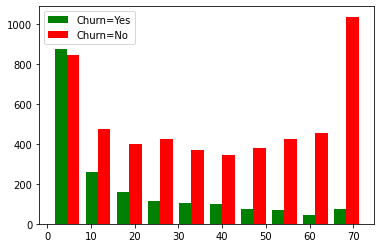

In [28]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.xlabel=("tenure")
plt.ylabel=("Number of Customers")
plt.title=("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [29]:
#plot showsmore tenure less customer leaving
#churn=no not leaving

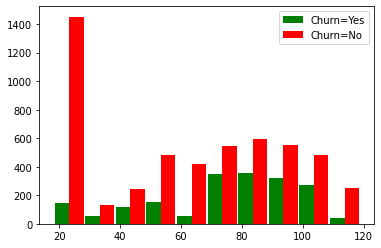

In [30]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.xlabel=("MonthlyCharges")
plt.ylabel=("Number of Customers")
plt.title=("Customer Churn Prediction Visualization")
plt.hist([mc_churn_yes,mc_churn_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [31]:
#customer who have high charges they are leaving like 120 montly charges

In [32]:
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [33]:
for column in df:
    print(f'{column}:{df[column].unique()}')
#F-strings provide a way to embed expressions inside string literals, using a minimal syntax. It should be noted that an f-string is really an expression evaluated at run time, not a constant value. In Python source code, an f-string is a literal string, prefixed with 'f', which contains expressions inside braces. The expressions are replaced with their values. Some examples are:

#>>> import datetime
#>>> name = 'Fred'
#>>> age = 50
#>>> anniversary = datetime.date(1991, 10, 12)
#>>> f'My name is {name}, my age next year is {age+1}, my anniversary is {anniversary:%A, %B %d, %Y}.'
#'My name is Fred, my age next year is 51, my anniversary is Saturday, October 12, 1991.'
#>>> f'He said his name is {name!r}.'
#"He said his name is 'Fred'."

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889

In [34]:
df['MonthlyCharges'][0]

29.85

In [35]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
           print(f'{column}:{df[column].unique()}')
    
    

        
    

In [36]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [39]:
#replacing no internet service and no phone service as no
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [40]:
#we have to converte text or a string type of column to number
yes_no_columns={'Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn'}
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No':0},inplace=True)
    
    


TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [41]:
print_unique_col_values(df1)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [42]:
for column in df1:
    print(f'{column}:{df1[column].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [43]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [44]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [45]:
#one hot encoding is takes the categories and built a two dimensinal array a[no of rows][n] and all elements are zero except 1 which denote the category
pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [46]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

df2.columns
#get dummies retain original column

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [47]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6642,0,0,0,0,25,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
6327,0,0,0,0,28,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
6975,1,0,1,1,24,1,1,1,1,1,...,1,0,0,0,0,1,0,0,1,0
2611,0,0,1,0,10,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [48]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [49]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
#these three columns are not in 0 and 1

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])
#remeber fit and transform are fit_transform not fit and transform

In [51]:
df2.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2247,1,0,0,0,0.549296,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [52]:
#we have created the data for training

In [53]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [55]:
X_train.shape

(5625, 26)

In [56]:
y_train.shape

(5625,)

In [57]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [58]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),#easy to compute relu that's why it is used in encoding and it is hidden layer it would have 26 inputs as we have 26 feature
    #do not need input layer as it would know what input would be
    keras.layers.Dense(1,activation='sigmoid') #"output layer has one and 0 so only one output 0 for activatted"
    
    
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', #because output is 0 or 1
    metrics=['accuracy']
    
)
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.7463
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.7972
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4191 - accuracy: 0.7996
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4155 - accuracy: 0.8020
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8012
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.8055
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4113 - accuracy: 0.8053
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4107 - accuracy: 0.8064
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.8036
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4092 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8190
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8178
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8171
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8208
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8180
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8149
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8162
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8169
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8204
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 

In [59]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.7861


[0.4436812400817871, 0.7860696315765381]

78% percent accuracy

In [60]:
yp=model.predict(X_test)
yp[:5]

array([[0.2792843 ],
       [0.4294699 ],
       [0.01194912],
       [0.75569326],
       [0.5730368 ]], dtype=float32)

In [61]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [62]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    
    

In [63]:
y_pred[:10]
#it predicted wrong for 4th place

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [64]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.66      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



#unbalanced data set
8

Your data set is unbalanced since 999 out of 1407 examples belong to class 0 (that is 71.0%). Therefore, your predictor almost always predicts any given sample as belonging to class 0 and thereby achieves very high scores like precision and recall for class 0 and very low scores for class 1.

In [65]:
import seaborn as sn


TypeError: 'str' object is not callable

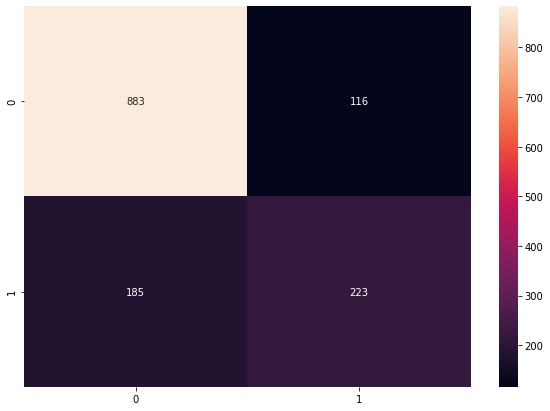

In [66]:
import seaborn as sn
cn=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')


In [67]:
round((860+246)/((860+246)+(139+162)),2) #two decimal places

0.79

#  precision

In [68]:
#precision for 0 class is how many time it predicted 0 when it was 0
round(860/(860+162),2)


0.84

In [69]:
round(246/(246+139),2)

0.64

# recall

# true prediction for 0 vstotal prediction for 0 

In [70]:
round(860/(860+139),2)

0.86

In [71]:
round(246/(246+162),2)

0.6

In [72]:
y_test[y_test==True]


5579    1
64      1
3287    1
816     1
6599    1
       ..
4653    1
5111    1
4396    1
4081    1
4899    1
Name: Churn, Length: 408, dtype: int64

In [73]:
y_test.shape

(1407,)

# handling imbalanced dataset

# Method 1:undersampling

In [74]:
count_class_0,count_class_1=df1.Churn.value_counts()


In [75]:
count_class_0,count_class_1

(5163, 1869)

In [82]:
#divide by class
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]
df_class_0.shape,df_class_1.shape

((5163, 27), (1869, 27))

In [83]:
#sampling random sample size of samplem 1 from sample 0
df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape


(3738, 27)

In [85]:
#using dot to access
df_test_under.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [86]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']

In [87]:
X.shape

(3738, 26)

In [88]:
y.shape

(3738,)

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)
#straifty matains StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.
#This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

#For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.


In [90]:
X_train.shape

(2990, 26)

In [91]:
X_test.shape

(748, 26)

In [93]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [95]:
y_test.value_counts()

1    374
0    374
Name: Churn, dtype: int64

see both y_train and y_test have equal 0 and 1 proportion

In [96]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [97]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6131 - accuracy: 0.6736
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7609
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7649
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7699
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7719
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.7742
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.7769
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.7759
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.7766
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4662 - accuracy: 0.7753
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8264
Epoch 83/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8151
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8244
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8237
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8284
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8291
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8224
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8254
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3889 - accuracy: 0.8224
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8294
Epoch 92/100


#  METHOD 2:OVERSAMPLING

In [98]:
count_class_0,count_class_1

(5163, 1869)

In [99]:
df_class_0.shape

(5163, 27)

In [100]:
df_class_1.shape

(1869, 27)

In [102]:
#originally we have 1869 samples but it showed 2000 which means it is duplicating
df_class_1.sample(2000,replace=True).shape

(2000, 27)

In [107]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

In [108]:
df_class_1_over.shape


(5163, 27)

In [110]:
df_class_1_over.shape,df_class_0.shape

((5163, 27), (5163, 27))

In [112]:
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.shape

(10326, 27)

In [114]:
df_test_over.Churn.value_counts()


1    5163
0    5163
Name: Churn, dtype: int64

In [117]:
X=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [118]:
X_train.shape

(8260, 26)

In [120]:
y_train.value_counts(),y_test.value_counts()

(1    4130
 0    4130
 Name: Churn, dtype: int64,
 1    1033
 0    1033
 Name: Churn, dtype: int64)

In [121]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.6808
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4983 - accuracy: 0.7539
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4904 - accuracy: 0.7565
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4842 - accuracy: 0.7634
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4816 - accuracy: 0.7655
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4783 - accuracy: 0.7707
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4752 - accuracy: 0.7711
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4726 - accuracy: 0.7791
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4705 - accuracy: 0.7754
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4687 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8306
Epoch 79/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8295
Epoch 80/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3820 - accuracy: 0.8259
Epoch 81/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8326
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8293
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8299
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8301
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3784 - accuracy: 0.8304
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8298
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 

# Method 3 smote

In [122]:
#it inserts synthetic samples by using k nearest neighbour algorithm

In [133]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']


In [134]:
from imblearn.over_sampling import SMOTE

In [135]:
smote=SMOTE(sampling_strategy='minority')
#humme 1 jo minority class h uspe lagani h

X_sm,y_sm=smote.fit_sample(X,y)
#Synthetic Minority Oversampling TEchnique

In [136]:
y_sm.value_counts(),X_sm.shape


(1    5163
 0    5163
 Name: Churn, dtype: int64,
 (10326, 26))

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [140]:
y_train.value_counts(),y_test.value_counts()

(1    4130
 0    4130
 Name: Churn, dtype: int64,
 1    1033
 0    1033
 Name: Churn, dtype: int64)

In [141]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.7547
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4696 - accuracy: 0.7760
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4608 - accuracy: 0.7797
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4558 - accuracy: 0.7826
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4518 - accuracy: 0.7878
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.7864
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4452 - accuracy: 0.7891
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4413 - accuracy: 0.7918
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4370 - accuracy: 0.7987
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4330 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8478
Epoch 81/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8511
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.8527
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3446 - accuracy: 0.8484
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8487
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8476
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8482
Epoch 87/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8545
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8493
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 

In [142]:
#model.fit is using mini batch training
# 4130*2/32 by default batch size is 32 which means it takes 32 sample at a time and then again and it will do it 259 which will cover all sample 4130*2
# https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network

# Method4: use of ensemble with undersampling


In [143]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [144]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [145]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [146]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [147]:
4130/1495

2.762541806020067

In [148]:
# it is nearlly 3 so we will divide 0th class in nearly 3 batches

In [149]:
4130/3

1376.6666666666667

In [151]:
df3=X_train.copy()
df3['Churn']=y_train
df3_class0=df3[df3.Churn==0]
df3_class1=df3[df3.Churn==1]

In [152]:
#create 3 batches and decide answer by voting

In [154]:
df3_class0.shape,df3_class1.shape

((4130, 27), (1495, 27))

In [155]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    
    X_train=df_train.drop('Churn',axis='columns')
    y_train=df_train.Churn
    
    return X_train,y_train

In [156]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,0,1495)
y_pred1=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.6846
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.7555
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7612
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7645
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7716
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7702
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7716
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7716
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8120
Epoch 83/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8094
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8137
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8144
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8100
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8137
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8151
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8120
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8097
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8117
Epoch 92/100


In [157]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,1495,2900)
y_pred2=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
91/91 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6255
Epoch 2/100
91/91 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7555
Epoch 3/100
91/91 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7679
Epoch 4/100
91/91 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7617
Epoch 5/100
91/91 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7655
Epoch 6/100
91/91 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7645
Epoch 7/100
91/91 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7693
Epoch 8/100
91/91 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7648
Epoch 9/100
91/91 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7645
Epoch 10/100
91/91 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7672
Epoch 11/

91/91 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8121
Epoch 83/100
91/91 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8148
Epoch 84/100
91/91 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8155
Epoch 85/100
91/91 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8169
Epoch 86/100
91/91 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8186
Epoch 87/100
91/91 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8203
Epoch 88/100
91/91 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.8190
Epoch 89/100
91/91 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8145
Epoch 90/100
91/91 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8197
Epoch 91/100
91/91 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8217
Epoch 92/100


In [158]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,2990,4130)
y_pred3=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6820
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7628
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7632
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7696
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7727
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7719
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7780
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7791
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7818
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7818
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8262
Epoch 81/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8228
Epoch 82/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8311
Epoch 83/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8243
Epoch 84/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8277
Epoch 85/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.8254
Epoch 86/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8307
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8304
Epoch 88/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8281
Epoch 89/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8254
Epoch 90/100


majority vote if majority is 1 then sum of 3 prediction will be greater than 1 otherwise 0

In [161]:
len(y_pred3)

1407

In [166]:
X_train.shape

(2635, 26)

In [167]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [168]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407

